# Ethnicity Evaluator

### OVERVIEW OF THIS PROJECT NOTEBOOK
#### What Can Be Found in Me:

1. ***Statement of Purpose***
2. ***Overview of the Data and Exploratory Analysis***
3. ***Overview of the Model (includes relevant metrics)***
4. ***Interactive Classification Widget and Data Visualization***

#### 1. Statement of Purpose

The purpose of this project is to create a model that will predict the ethinicity of an individual based solely on their name. As of now, this model only works in distinguishing between Jewish and Non-Jewish individuals. For the purpose of this project- Jew is defined solely as an ethnicity and not anything else (e.g religion)

Use Case: There can be many use cases for this but specifically individuals and/or companies that are interested in this kind of information for marketing purposes. An example of this would be an advertising company that wants to customize its ads or promotions for the target population. This company can see if within a specific geographic region there is a large population of a specific ethnicity and then develop the ads or promotions accordingly. Another use case with my model specifically how it is right now- a binary prediction of Jewish or not-Jewish- could be for Jewish organization that are trying to market to, fundraise from, or provide services to a Jewish individual or population.

Limitations:
- The bias in the dataset as a result of the limited scope and its representation of only a subsample of the population

BIAS:
Although from the metrics, the model seems pretty accurate, the inherent biases present in both the datasets used (see below) are too large to ignore. 
The former dataset (the Jewish one) is not necessarily representative of the entire population of ethnic Jews, rather it is representative of the sub-population of people who donate to the Orthodox Union. For the latter dataset (the non-Jewish one), again it is not representative of non-Jews on a global or even national level. In a place like the United States with a wide range of demographics across the nation, it is highly likely that in one location ( - especially a more rural location such as Dane Wisconsin as opposed to an urban location where presumably there is a larger demographic range) there is not a representation of all of the demographics that are present in the nation, and therefore introduce a bias into the model when it tries to recognize a name that is not-Jewish but doesn’t resemble the non-Jewish names it was trained on.



Future Goals: 
- I would like to incoporate more datasets into this model to reduce bias
- I would like further improve the feature extraction in building this model to increase accuracy
- I would like turn this model into a multi-classifier with multiple ethnicities

#### 2. Overview of the data and exploratory analysis 

***for the Jewish data set***


The Jewish dataset is scraped from list of names at https://www.ou.org/benefactor/.
Before I cleaned and extracted the relevant data from this scraped data, the data looked like this: 
(I extracted it using this regex: 

In [206]:
extract_regex = re.compile(r'<li>([A-Za-z \. "\(\)]*?)</li>')

In [192]:
scraped_data = open("Original_scraped.txt",'r')
content = scraped_data.read()
print(content)
scraped_data.close()

DAN AND EWA ABRAHAM
DRS. FELIX AND MIRIAM GLAUBACH
BECKY AND AVI KATZ
DR. SHMUEL AND EVELYN KATZ
THE MARCUS FOUNDATION INC.
IN MEMORY OF ANNE SAMSON A"H
EMANUEL AND HELEN ADLER
IN MEMORY OF AHARON BEN YAAKOV SHALOM AND LEAH BAS YITZHAK
MARK (MOISHE) AND JOANNE BANE
DAHAN FAMILY PHILANTHROPIES
ROBERT AND MICHELLE DIENER
MITCHELL AND ANNETTE EICHEN
ARIELA AND BENITO ESQUENAZI IN HONOR OF THE MENDEL BALK YACHAD COMMUNITY CENTER
MR. AND MRS. JACK FEINTUCH
ELLIOT P. AND DEBORAH GIBBER
ALAN AND BARBARA GINDI
THE GUSTAVE AND CAROL JACOBS CENTER FOR KASHRUT EDUCATION
MORDECAI Z"L AND MONIQUE KATZ
THE KOHELET FOUNDATION
THE JEWISH FEDERATION OF GREATER LOS ANGELES
THE JEWISH FEDERATION OF METROPOLITAN CHICAGO
MICHAEL AND ANDREA LEVEN
DAVID AND DEBRA MAGERMAN
MAYBERG FOUNDATION
RAPHAEL AND RIVKA NISSEL
RALLA KLEPAK FOUNDATION FOR EDUCATION IN THE PERFORMING ARTS
ERIC AND GALE A"H ROTHNER
RUDERMAN FAMILY FOUNDATION
MARK AND BARBARA SILBER
MORIS AND LILLIAN TABACINIC
JOYCE AND JEREMY WERTHEIMER
AL

I then realized that there were many different facets that I had to work with in order to get the right data. Below is the original list that I made:

- need to clean data::
    - get rid of titles
    - get rid of Z"L and other suffixs appended to name (for e.g ' Z"L', 'Z"l', ' A"H', 'Dr. ', 'Drs. ', 'Rabbi ', 'Mr. ', 'Mrs. ', 'Prof. ', 'RABBI ', 'DR. ', 'MRS. ', 'MR. ', 'PROF. ', 'DR. ', 'DRS. ')
    - split husband and wife names 
    - get rid of organizations listed


To accomplish these I utilized a series of regexs, splits, and other Python built-in functions and utilities. I started with this code: 

In [ ]:
#credits to: https://stackoverflow.com/questions/4998629/split-string-with-multiple-delimiters-in-python

#remove the extra prefix and suffixes from the names
delim = ' Z"L', 'Z"l', ' A"H', 'Dr. ', 'Drs. ', 'Rabbi ', 'Mr. ', 'Mrs. ', 'Prof. ', 'RABBI ', 'DR. ', 'MRS. ', 'MR. ', 'PROF. ', 'DR. ', 'DRS. '
pat = '|'.join(map(re.escape, delim))
without_extras = re.split(pat, name)
#print(without_extras)
new_name = "".join(without_extras)


And I got this:

In [196]:
more_data = open("without_prefixes.txt",'r')
content = more_data.read()
print(content)
more_data.close()

['DAN AND EWA ABRAHAM']
['', 'FELIX AND MIRIAM GLAUBACH']
['BECKY AND AVI KATZ']
['', 'SHMUEL AND EVELYN KATZ']
['THE MARCUS FOUNDATION INC.']
['IN MEMORY OF ANNE SAMSON', '']
['EMANUEL AND HELEN ADLER']
['IN MEMORY OF AHARON BEN YAAKOV SHALOM AND LEAH BAS YITZHAK']
['MARK (MOISHE) AND JOANNE BANE']
['DAHAN FAMILY PHILANTHROPIES']
['ROBERT AND MICHELLE DIENER']
['MITCHELL AND ANNETTE EICHEN']
['ARIELA AND BENITO ESQUENAZI IN HONOR OF THE MENDEL BALK YACHAD COMMUNITY CENTER']
['', 'AND ', 'JACK FEINTUCH']
['ELLIOT P. AND DEBORAH GIBBER']
['ALAN AND BARBARA GINDI']
['THE GUSTAVE AND CAROL JACOBS CENTER FOR KASHRUT EDUCATION']
['MORDECAI', ' AND MONIQUE KATZ']
['THE KOHELET FOUNDATION']
['THE JEWISH FEDERATION OF GREATER LOS ANGELES']
['THE JEWISH FEDERATION OF METROPOLITAN CHICAGO']
['MICHAEL AND ANDREA LEVEN']
['DAVID AND DEBRA MAGERMAN']
['MAYBERG FOUNDATION']
['RAPHAEL AND RIVKA NISSEL']
['RALLA KLEPAK FOUNDATION FOR EDUCATION IN THE PERFORMING ARTS']
['ERIC AND GALE', ' ROTHNER']
['R

I used this code below to make sure that no organizations, memorials, or funds were included:


In [179]:
if "In Memory of" in new_name or 'IN MEMORY OF' in new_name or 'CAPITAL' in new_name or "Capital" in new_name or "FAMILY" in new_name or "Family" in new_name or "Foundation" in new_name or 'FOUNDATION' in new_name or "in honor of" in new_name or 'IN HONOR OF' in new_name or " Fund" in new_name or ' FUND' in new_name:
    continue

SyntaxError: 'continue' not properly in loop (<ipython-input-179-b40366d35874>, line 2)

And finally, I wanted to extract every half of an individual couple's name from a line that included a couple. 
- If there was no first name for the woman, then only the husbands name was included. 
- If the woman's maiden name was included then that was the last name give to her, otherwise I append the husbands last name for her as well. 
- I also wanted to make the names standardized in terms of case; capitolized first letter and lower-case the rest of the words

The output looked like this:

In [224]:
jewish_names = open("jewish_names.txt",'r')
content = jewish_names.read()
print(content)
jewish_names.close()

Dan Abraham
Ewa Abraham
Felix Glaubach
Miriam Glaubach
Becky Katz
Avi Katz
Shmuel Katz
Evelyn Katz
Emanuel Adler
Helen Adler
Mark (moishe)
Joanne Bane
Robert Diener
Michelle Diener
Mitchell Eichen
Annette Eichen
Jack Feintuch
Elliot P.
Deborah Gibber
Alan Gindi
Barbara Gindi
Mordecai Katz
Monique Katz
Michael Leven
Andrea Leven
David Magerman
Debra Magerman
Raphael Nissel
Rivka Nissel
Eric Rothner
Gale Rothner
Mark Silber
Barbara Silber
Moris Tabacinic
Lillian Tabacinic
Joyce Wertheimer
Jeremy Wertheimer
Allen Alevy
Deanna Alevy
Howard Balter
Chaya Balter
Lewis Barbanel
Lauri Barbanel
Daniel Benedict
Razie Benedict
Judi Berman
Jason Berman
Hillel Brachfeld
Charlotte Brachfeld
Cross River Bank
Neil Cohen
Sherry Cohen
Grant Dinner
Jennifer Dinner
Gershon Distenfeld
Aviva Distenfeld
Amir Goldman
Stacey Goldman
Ephraim Greenfield
Rita Greenfield
Richard Hirsch
Allan Jacob
Sandy Jacob
Ezra Kest
Lauren Kest
Etta Klaristenfeld
Harry Klaristenfeld
Chuck Mamiye
Allegra Mamiye
Eitan Milgram
Debr

***for the "non-Jewish" data set***

I scraped this data from the site https://danesheriff.com/Residents using a more simple process than with the Jewish data set:

I used this regex: extract_regex = re.compile(r'<td>([A-Z a-z,-]*?)</td>') which gave me:

In [204]:
scraped_n_j = open("original_not_jewish_scraped.txt",'r')
content = scraped_n_j.read()
print(content)
scraped_n_j.close()

ABDUL-AHAD, AZIM M
ABLER, JOHN ARTHUR
ACOSTA-VILLA, JOSUE 
ADAMS, TREVON LANELL
ADAMS STREIFF, DAVION 
ADKINS, BRIAN KEITH
ALES, MICHELLE LYNN
ALFORD-LOFTON, DONALD DONNELL
AMAKOBE, ORIANA NASAKA
AMATO, MARK ALLEN
AMERSON, ANTHONY ERIC
AMEZCUA CARDENAS, MARIO ULISES
AMEZCUA CARDENAS, MOISES ALEJANDRO
ANDERSON, ROBERT CLARENCE
ANDREWS, MELISSA LENAE
ANUNDSON, JALEN JEROME
ARIAS, DAVID STEVEN
ARMOND, MARCUS ANTOINE
ARN, CHRISTOPHER MICHAEL
ASHMORE, RYAN JAMES
AVILES GARCIA, PEDRO 
BACON, DONALD WAYNE
BAGNE, LEVI DAVID
BAGNESKI, JEFFREY HOWARD
BAIN, JEFFREY ROBERT
BAKER, CAMARA DIVIN LEE
BALCARCEL, JOSEPH BYRON
BALL, THOMAS LYNN
BANKS, DENNIS DEWAYNE
BARE, GABRIEL DURONE
BARNEY, JOSEPH DARNELL
BATY, JERRED DEAN
BAUMANN, JONATHAN WAYNE
BAUMANN, TIMOTHY JOHN
BAUMGARDT, JUSTIN MATTHEW
BEADLES, JESSE TERRELDIONE
BECK, BERNARD KASHAWN
BECK, RONALD STUART
BEECHER, CASSANDRA COLLEEN
BEHM, SETH MICHAEL
BELL, DELDEMONTE DUSHAWN
BELL, DEVORE OCTAVIUS
BELL, MAX ETHAN
BELL, ZACKERY HOLIDAY
BENNESH, A

I then split the names, reformed them into first and last name (in that order) and changed the capitalization.
The output looked like this:

In [225]:
data_n_j = open("non_jewish_names.txt",'r')
content = data_n_j.read()
print(content)
data_n_j.close()

Azim M Abdul-ahad
John Arthur Abler
Trevon Lanell Adams
Davion Adams Streiff
Brian Keith Adkins
Ben Eric Ahlenius
Michelle Lynn Ales
Joshua James Alexander
Donald Donnell Alford-lofton
Oriana Nasaka Amakobe
Mark Allen Amato
Anthony Eric Amerson
Mario Ulises Amezcua Cardenas
Moises Alejandro Amezcua Cardenas
Robert Clarence Anderson
Melissa Lenae Andrews
Jalen Jerome Anundson
David Steven Arias
Marcus Antoine Armond
Christopher Michael Arn
Ryan James Ashmore
Pedro Aviles Garcia
Donald Wayne Bacon
Levi David Bagne
Jeffrey Howard Bagneski
Jeffrey Robert Bain
Camara Divin Lee Baker
Joseph Byron Balcarcel
Thomas Lynn Ball
Dennis Dewayne Banks
Gabriel Durone Bare
Joseph Darnell Barney
Jerred Dean Baty
Jonathan Wayne Baumann
Timothy John Baumann
Justin Matthew Baumgardt
Jesse Terreldione Beadles
Bernard Kashawn Beck
Ronald Stuart Beck
Cassandra Colleen Beecher
Seth Michael Behm
Deldemonte Dushawn Bell
Devore Octavius Bell
Max Ethan Bell
Zackery Holiday Bell
Aaron John Bennesh
Lashawn Morris B

After labeling and combining both these sets, the list of data looks like this:

In [229]:
all_data = open("all_names.txt",'r')
content = all_data.read()
print(content)
all_data.close()

[('Fran Woolf', 'JEWISH'), ('David Woolf', 'JEWISH'), ('Shabsai Wolfe', 'JEWISH'), ('Debbie Wolfe', 'JEWISH'), ('David Wolf', 'JEWISH'), ('Natalie Wolf', 'JEWISH'), ('Jorge Woldenberg', 'JEWISH'), ('Tammara Woldenberg', 'JEWISH'), ('David Wittenberg', 'JEWISH'), ('Howard Wiesenfeld', 'JEWISH'), ('Batia Wiesenfeld', 'JEWISH'), ('Chaim Wielgus', 'JEWISH'), ('Miriam 
Wielgus', 'JEWISH'), ('Aryeh Wielgus', 'JEWISH'), ('Yael Wielgus', 'JEWISH'), ('Lennie Weiss', 'JEWISH'), ('Jessica Weiss', 'JEWISH'), ('Ari Weisman', 'JEWISH'), ('Caroline Weisman', 'JEWISH'), ('Esther Weinstein', 'JEWISH'), ('Baruch Weinstein', 'JEWISH'), ('Joshua Wanderer', 'JEWISH'), ('Leslie Wanderer', 'JEWISH'), ('Daniel Walzman', 'JEWISH'), ('Sara Walzman', 'JEWISH'), ('Daniel Uretsky', 'JEWISH'), ('Zahavah Uretsky', 'JEWISH'), ('Shlomo Troodler', 'JEWISH'), ('Ronni Troodler', 'JEWISH'), ('Sam Tramiel', 'JEWISH'), ('Tzipi Tramiel', 'JEWISH'), ('Tal Tours', 'JEWISH'), ('Jonathan Tiger', 'JEWISH'), ('Rachel Tiger', 'JEWI

#### 3. Overview of the Model (includes relevant metrics)

 I used a Naive Bayes Classifier (from NLTK) to create the classification model using the labeled data above.

***Feature Extraction***

I had to figure out how to turn the names into features. If I used entire names then I would risk seriously overfitting and confusing my model. Instead, I initially turned to the built-in n-grams function supplied by NLTK. I extracted trigrams, unigrams, bigrams, and four_grams and trained the model using each of these sets of features.

My results were as follows:

    Model with the features as trigrams
    - Accuracy is:  0.5487012987012987
    - Precision is:  0.5

    Model with the features as bigrams
    - Accuracy is:  0.5422077922077922
    - Precision is:  0.5

    Model with the features as four grams
    - Accuracy is:  0.5324675324675324
    - Precision is:  0.5

    Model with the features as unigrams
    - Accuracy is:  0.5292207792207793
    - Precision is:  0.5

This is clearly NOT a great model, predicting correctly around half of the time!!! This is probably because its overfitting on the given features.

I then attempted a different and simpler feature extraction method which yielded much better results...

This time I just grabbed the prefix and suffix of both the first name and last name of each entry, totalling four features for each name. I varied the length of the prefix and suffix between 2,3, and 4 and these are the results:

    suffix/prefix features set with three
    -Accuracy is:  0.8214285714285714
    -Precision is:  1.0

    suffix/prefix features set with two
    -Accuracy is:  0.8181818181818182
    -Precision is:  1.0

    suffix/prefix features set with four
    -Accuracy is:  0.8636363636363636
    -Precision is:  1.0

As indicated, these models were much more accurate and the one with prefix/suffix size of four yielding the most accurate results. This I used the last method of feature extraction for my model. This is the Confusion Matrix for this last model:

#### 4. Interactive Classification Widget and Data Visualization

In [213]:
import pickle as pkl
import random
from Main import extract_features_more
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [214]:
with open('classifier.pkl','rb') as myfile:
    clf = pkl.load(myfile)

In [215]:
clf.show_most_informative_features()

Most Informative Features
             last_suffix = 'berg'         JEWISH : NOT_JE =     18.7 : 1.0
             last_suffix = 'lson'         NOT_JE : JEWISH =      7.9 : 1.0
             last_suffix = 'rman'         JEWISH : NOT_JE =      7.3 : 1.0
            first_prefix = 'Jame'         NOT_JE : JEWISH =      7.1 : 1.0
            first_suffix = 'ames'         NOT_JE : JEWISH =      6.4 : 1.0
             last_prefix = 'Cohe'         JEWISH : NOT_JE =      5.7 : 1.0
             last_suffix = 'ohen'         JEWISH : NOT_JE =      5.6 : 1.0
             last_suffix = 'witz'         JEWISH : NOT_JE =      5.6 : 1.0
            first_suffix = 'chel'         JEWISH : NOT_JE =      5.6 : 1.0
            first_prefix = 'Rach'         JEWISH : NOT_JE =      5.6 : 1.0


(Some notes for running the widget below,
    - first run the cell, then when then notebook moves to the next cell, enter a name into the text box, and then DONT RUN this cell again- instead go to the next cell and start running from there)

In [216]:
name = widgets.Text(placeholder='Type Here', description='Name:', disabled=False)
out = widgets.Output(layout={'border': '1px solid black'})
out
display(out)
with out:
    #name = name.value
    display(name)

Output(layout=Layout(border='1px solid black'))

In [217]:
name = name.value
# print(name)

In [218]:
with out:
    output = out.append_stdout("Ethnicity classification: " + clf.classify(extract_features_more(name, 4)))
    #display(output)

***Graph of probability of each label for given input***

In [220]:
dist = clf.prob_classify(extract_features_more(name, 4))
j = dist.prob('JEWISH')
nj = dist.prob('NOT_JEWISH')
print(j, nj)

0.9461932379082565 0.05380676209174289


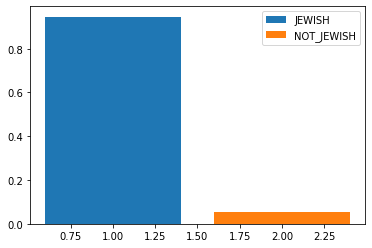

In [221]:
plt.bar(1,j, label = "JEWISH")
plt.bar(2,nj, label = "NOT_JEWISH")
plt.legend()
plt.show()